In [24]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [25]:
# Load the dataset provided
df = pd.read_csv("data.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
#Understand the Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [28]:
#Create Purchase Amount Column
df['PurchaseAmount'] = df['Quantity'] * df['UnitPrice']
df.head()
df = df[(df['PurchaseAmount'] > 0)]

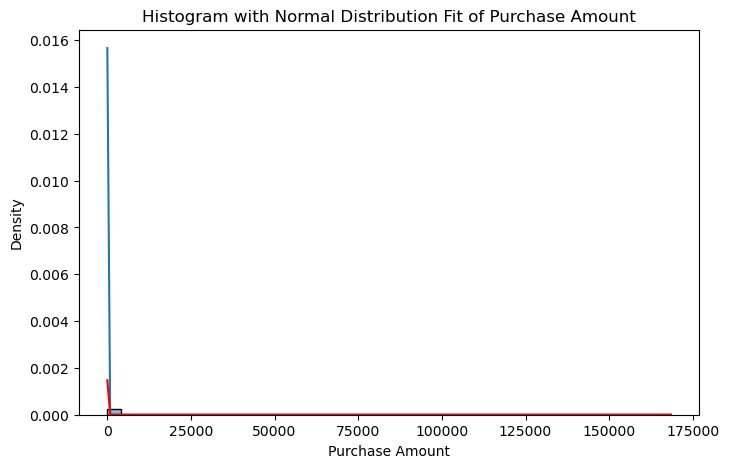

In [29]:
#Histogram & Normal Distribution Fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

purchase = df['PurchaseAmount']

mean = purchase.mean()
std = purchase.std()

plt.figure(figsize=(8,5))
sns.histplot(purchase, bins=40, kde=True, stat="density")

x = np.linspace(purchase.min(), purchase.max(), 200)
plt.plot(x, norm.pdf(x, mean, std), color='red')

plt.title("Histogram with Normal Distribution Fit of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.show()


In [30]:
#Probability of Spending Above a Threshold
threshold = 1000
prob = 1 - norm.cdf(threshold, mean, std)
print(f"Probability that purchase amount is above {threshold}: {prob:.4f}")

Probability that purchase amount is above 1000: 0.0001


In [31]:
#Standardization (Z-Score)
df['Z_Score'] = (purchase - mean) / std
df[['PurchaseAmount', 'Z_Score']].head()

,PurchaseAmount,Z_Score
0,15.30,-0.017835
1,20.34,0.000807
2,22.00,0.006947
3,20.34,0.000807
4,20.34,0.000807


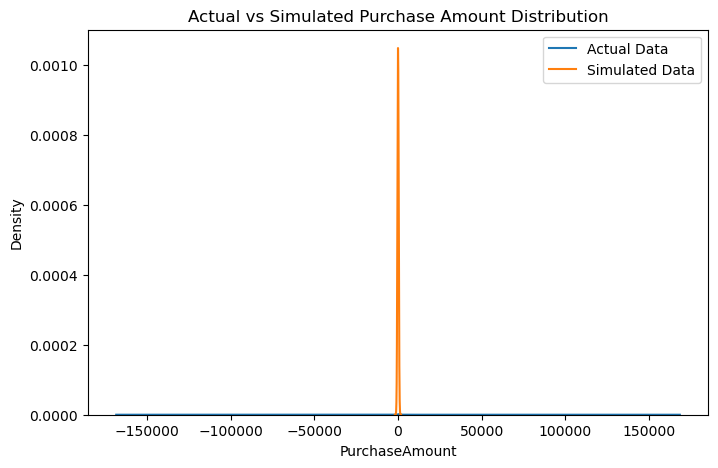

In [16]:
#Simulate Random Sales Data & Compare
simulated_data = np.random.normal(mean, std, len(purchase))

plt.figure(figsize=(8,5))
sns.kdeplot(purchase, label="Actual Data")
sns.kdeplot(simulated_data, label="Simulated Data")

plt.title("Actual vs Simulated Purchase Amount Distribution")
plt.legend()
plt.show()